# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import StratifiedKFold

data: pd.DataFrame = pd.read_csv('heart_failure_clinical_records_dataset_after_preparation.csv', sep=';')

## 3.0. Training Models

---

### Training Models

---

#### StratifiedKFold function
After loading the data, in data dataframe, we need to separate the target variable which is the DEATH_EVENT from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves

In [2]:
target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

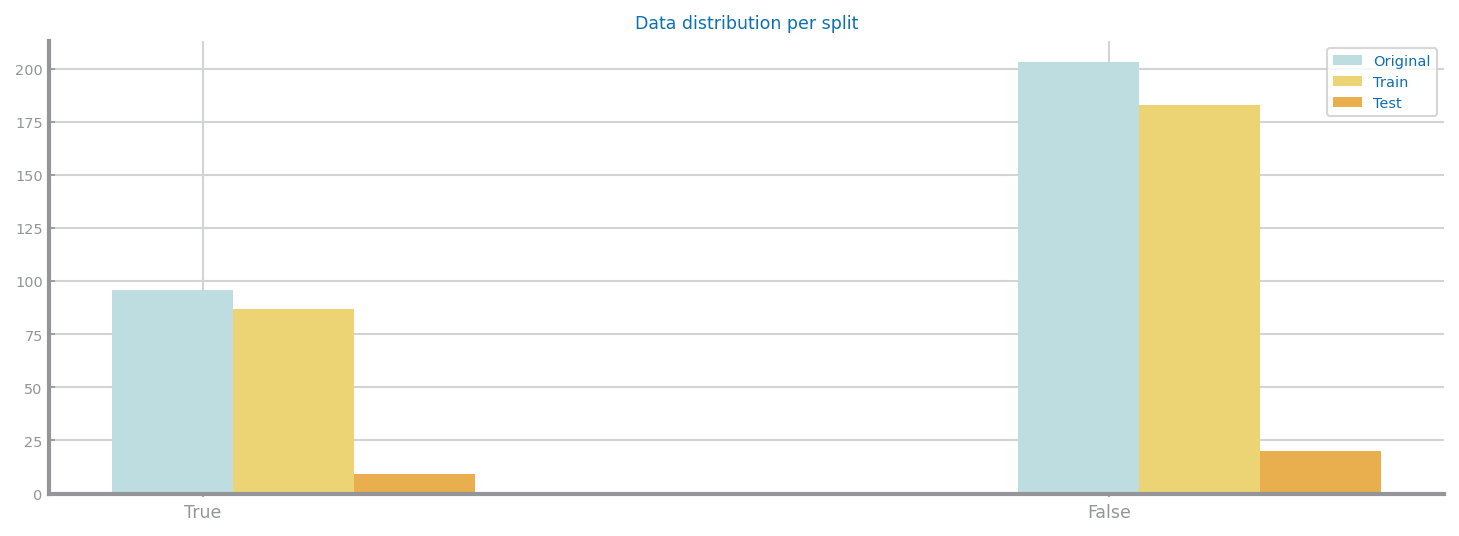

In [3]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

splits=[]

for train_index, test_index in skf.split(X, y):
    splits.append({'X_train': X[train_index], 'X_test': X[test_index],
                  'y_train': y[train_index], 'y_test': y[test_index]})

values['Train'] = [len(np.delete(y[train_index], np.argwhere(y[train_index]==negative))), len(np.delete(y[train_index], np.argwhere(y[train_index]==positive)))]
values['Test'] = [len(np.delete(y[test_index], np.argwhere(y[test_index]==negative))), len(np.delete(y[test_index], np.argwhere(y[test_index]==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per split', showXTickLabels=True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

### Evaluation

---

#### Accuracy
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [4]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    print(clf.score(split['X_test'], split['y_test']))

0.8333333333333334
0.6666666666666666
0.6333333333333333
0.7333333333333333
0.6666666666666666
0.8333333333333334
0.7666666666666667
0.8333333333333334
0.7666666666666667
0.8620689655172413


In our example we can see that naive Bayes is better with some splits than others.

#### Confusion Matrix
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [5]:
import sklearn.metrics as metrics

labels: np.ndarray = pd.unique(y)
    
for split in splits:
    prdY: np.ndarray = clf.predict(split['X_test'])
    cnf_mtx: np.ndarray = metrics.confusion_matrix(split['y_test'], prdY, labels)
    split['prdY'] = prdY
    split['cnf_mtx'] = cnf_mtx
    print(cnf_mtx)

[[ 6  4]
 [ 1 19]]
[[ 6  4]
 [ 0 20]]
[[ 2  8]
 [ 2 18]]
[[ 5  5]
 [ 3 17]]
[[ 4  6]
 [ 3 17]]
[[ 6  4]
 [ 0 20]]
[[ 5  4]
 [ 2 19]]
[[ 6  3]
 [ 2 19]]
[[ 4  5]
 [ 2 19]]
[[ 7  2]
 [ 2 18]]


<Figure size 600x450 with 0 Axes>

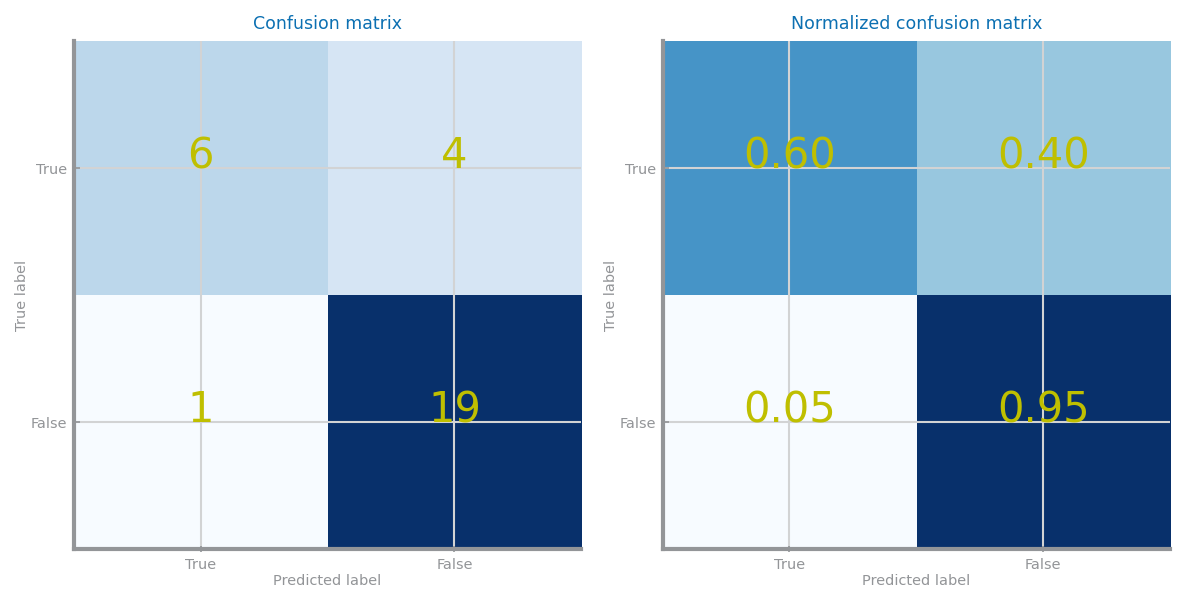

<Figure size 600x450 with 0 Axes>

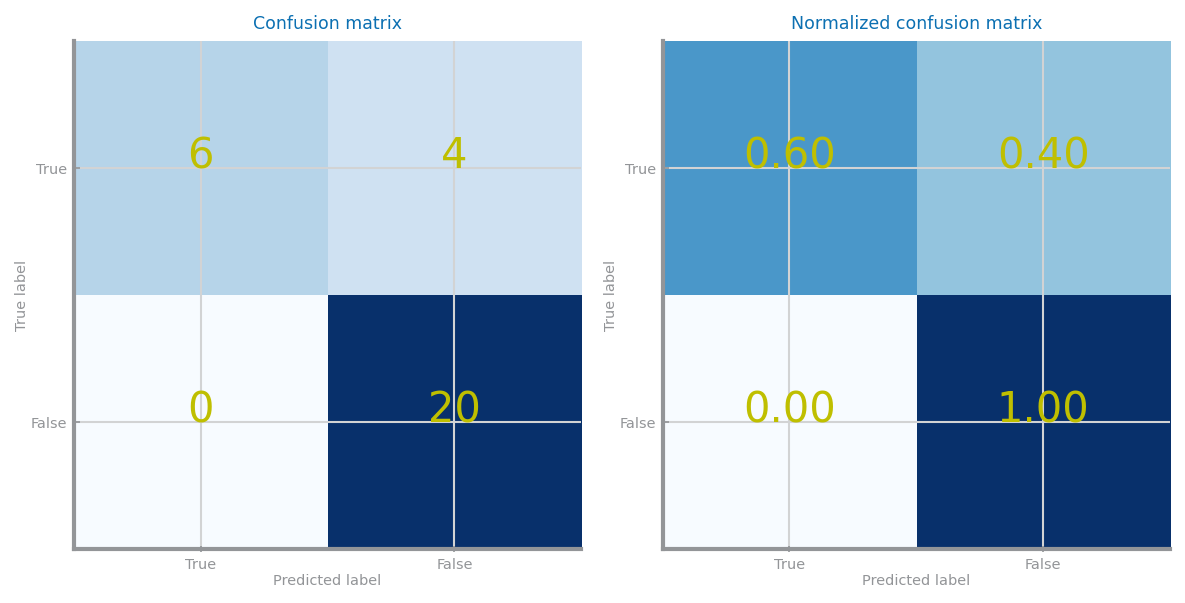

<Figure size 600x450 with 0 Axes>

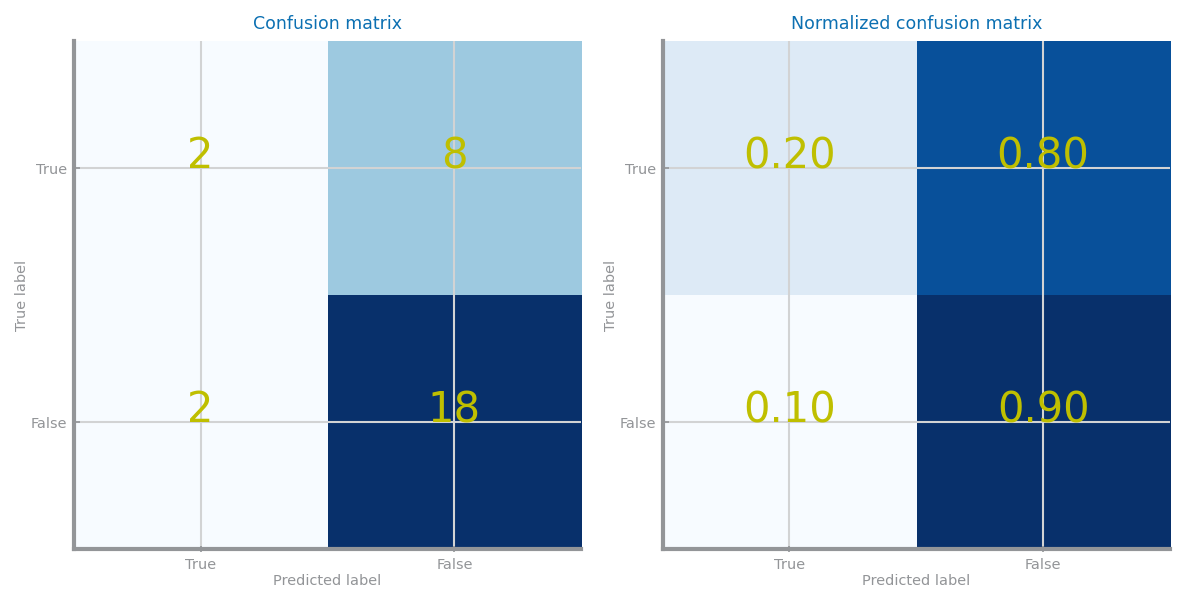

<Figure size 600x450 with 0 Axes>

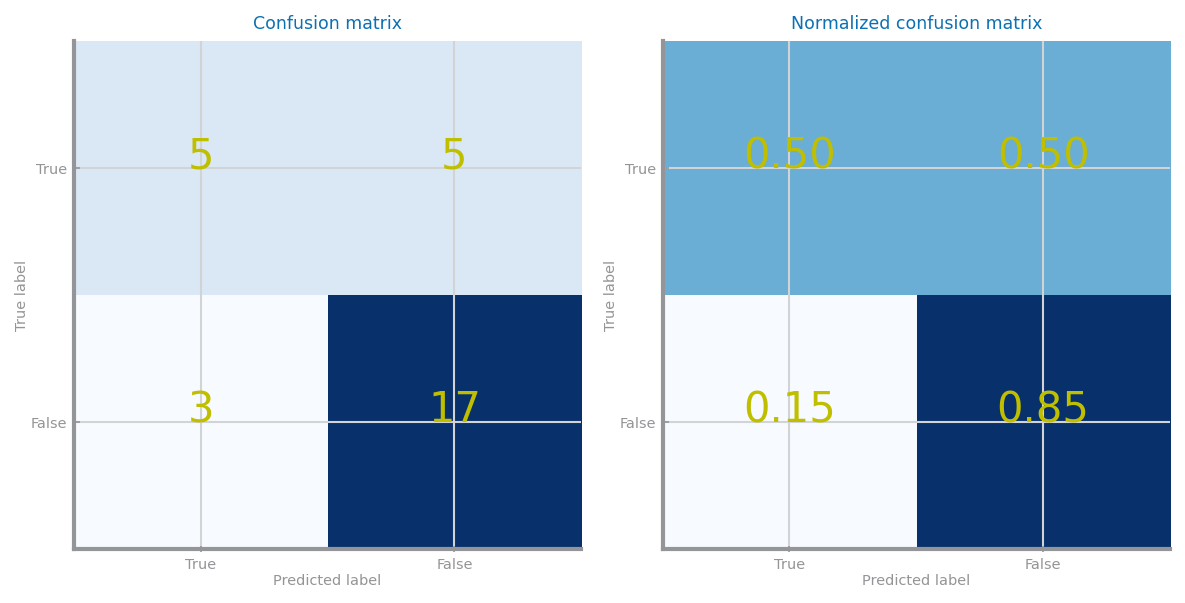

<Figure size 600x450 with 0 Axes>

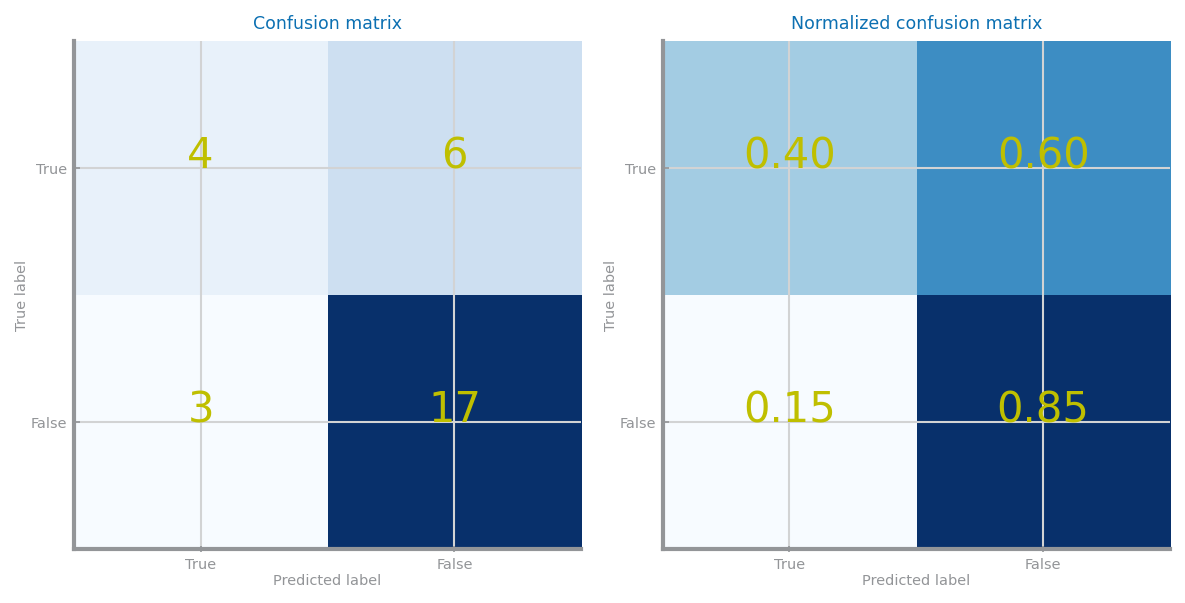

<Figure size 600x450 with 0 Axes>

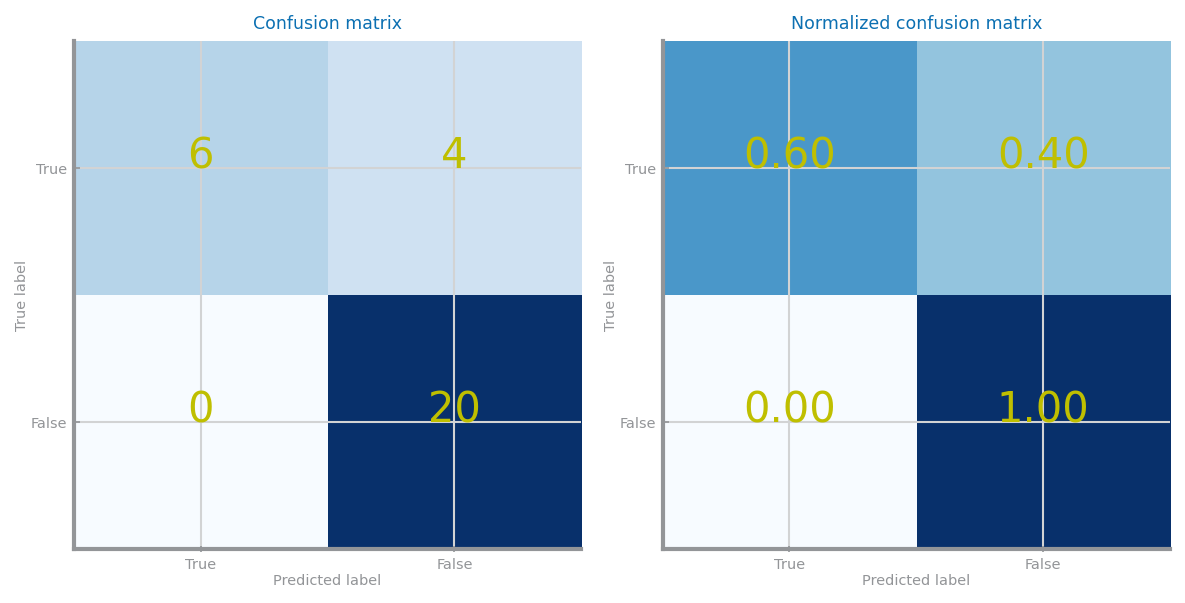

<Figure size 600x450 with 0 Axes>

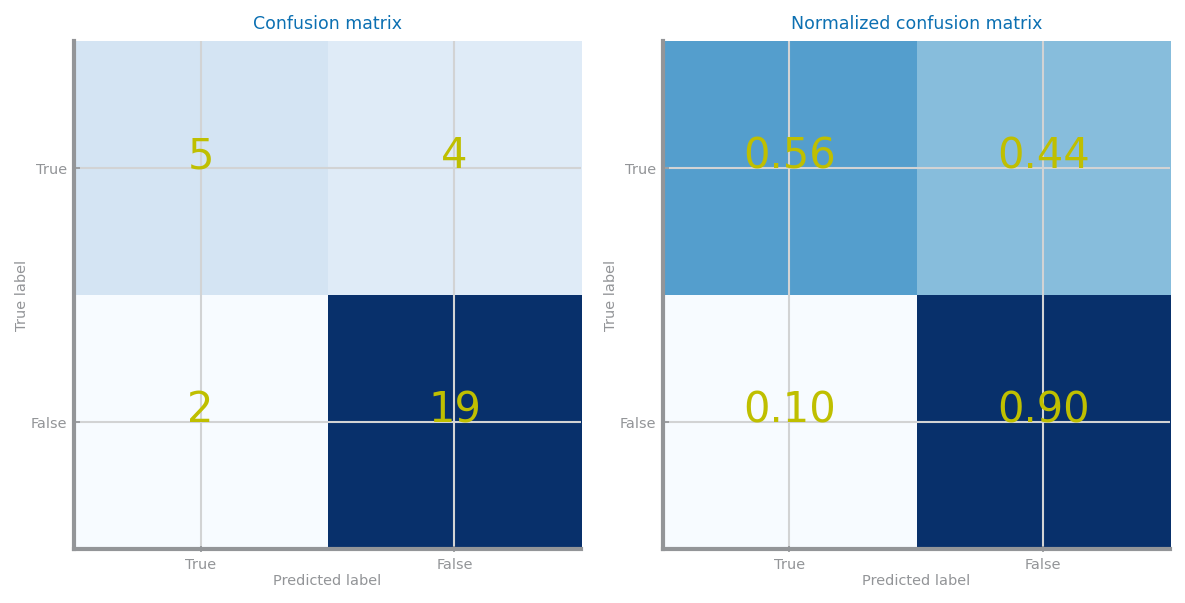

<Figure size 600x450 with 0 Axes>

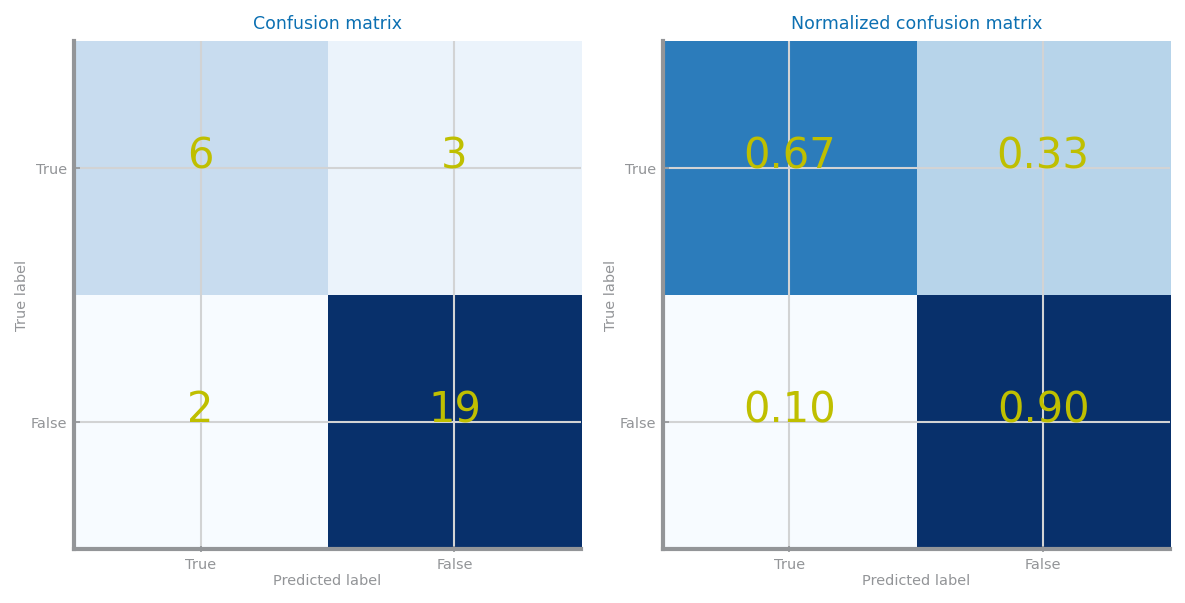

<Figure size 600x450 with 0 Axes>

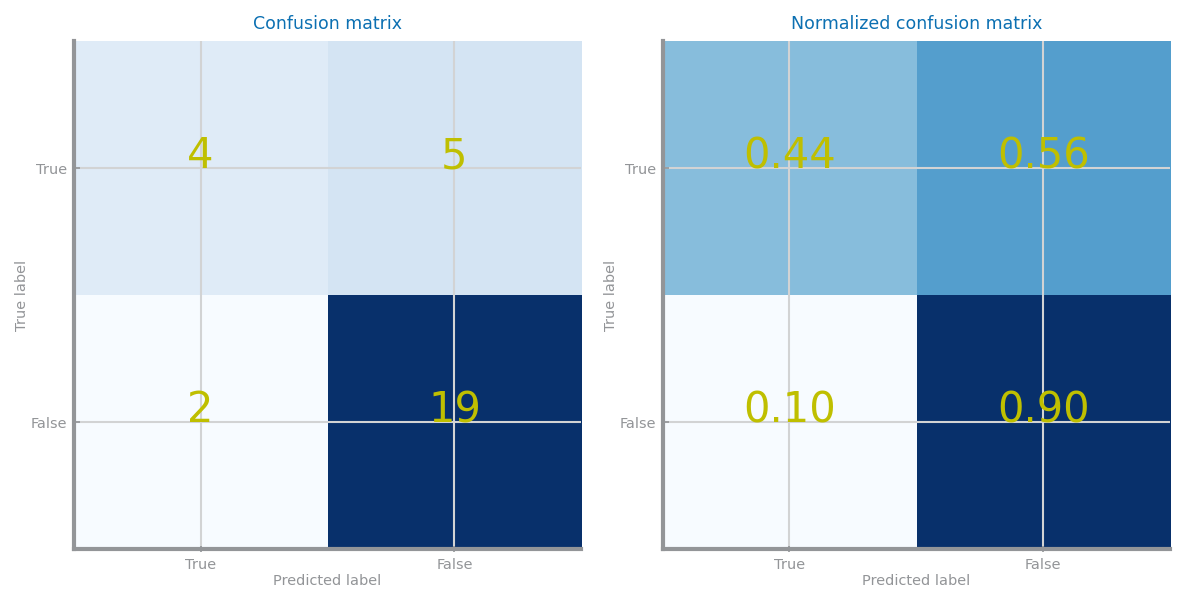

<Figure size 600x450 with 0 Axes>

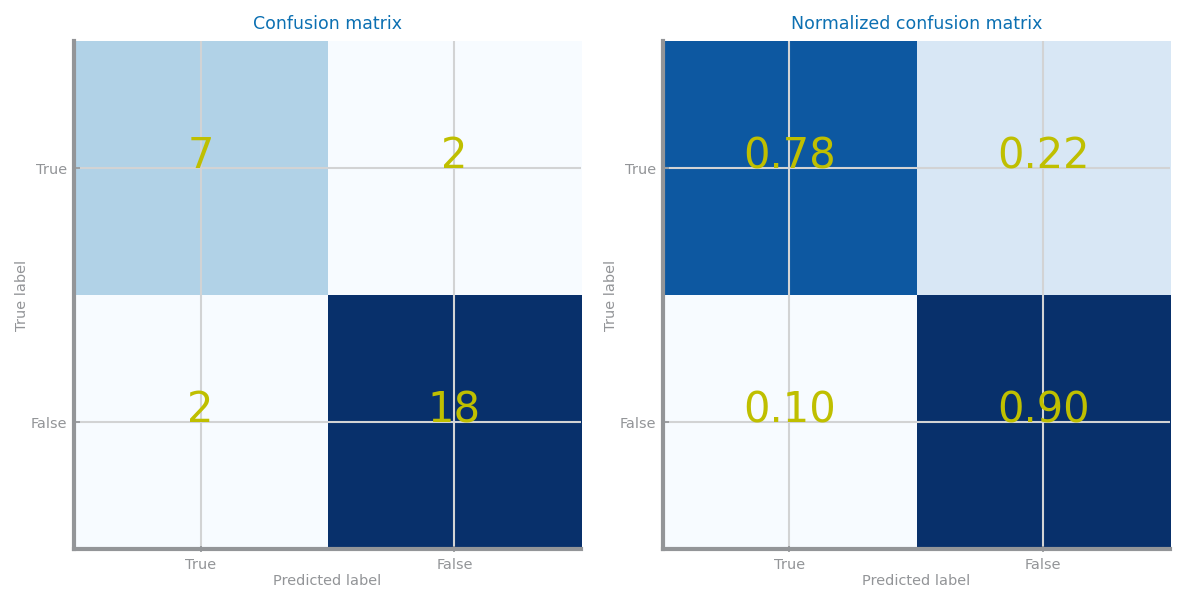

In [6]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray, ax: plt.Axes = None,
                          normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='y', horizontalalignment="center", size=20)

for split in splits:
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
    plot_confusion_matrix(split['cnf_mtx'], labels, ax=axs[0,0])
    plot_confusion_matrix(metrics.confusion_matrix(split['y_test'], split['prdY'], labels), labels, axs[0,1], normalize=True)
    plt.tight_layout()
    plt.show()

#### Classification metrics

In [7]:
for split in splits:
    print('Recall Score: ', metrics.recall_score(split['y_test'], split['prdY']))
    print('Precision Score: ', metrics.precision_score(split['y_test'], split['prdY']))
    print('F1 Score: ', metrics.f1_score(split['y_test'], split['prdY']))
    print('Balanced Accuracy Score: ', metrics.balanced_accuracy_score(split['y_test'], split['prdY']))
    print('----')

Recall Score:  0.6
Precision Score:  0.8571428571428571
F1 Score:  0.7058823529411764
Balanced Accuracy Score:  0.7749999999999999
----
Recall Score:  0.6
Precision Score:  1.0
F1 Score:  0.7499999999999999
Balanced Accuracy Score:  0.8
----
Recall Score:  0.2
Precision Score:  0.5
F1 Score:  0.28571428571428575
Balanced Accuracy Score:  0.55
----
Recall Score:  0.5
Precision Score:  0.625
F1 Score:  0.5555555555555556
Balanced Accuracy Score:  0.675
----
Recall Score:  0.4
Precision Score:  0.5714285714285714
F1 Score:  0.47058823529411764
Balanced Accuracy Score:  0.625
----
Recall Score:  0.6
Precision Score:  1.0
F1 Score:  0.7499999999999999
Balanced Accuracy Score:  0.8
----
Recall Score:  0.5555555555555556
Precision Score:  0.7142857142857143
F1 Score:  0.6250000000000001
Balanced Accuracy Score:  0.7301587301587302
----
Recall Score:  0.6666666666666666
Precision Score:  0.75
F1 Score:  0.7058823529411765
Balanced Accuracy Score:  0.7857142857142857
----
Recall Score:  0.44444

## 3.1. Naive Bayes

---

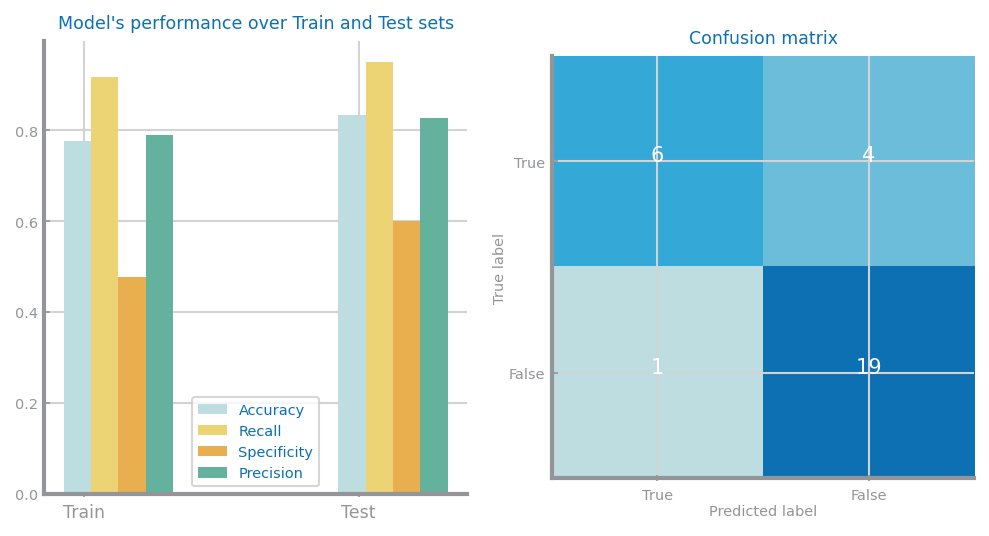

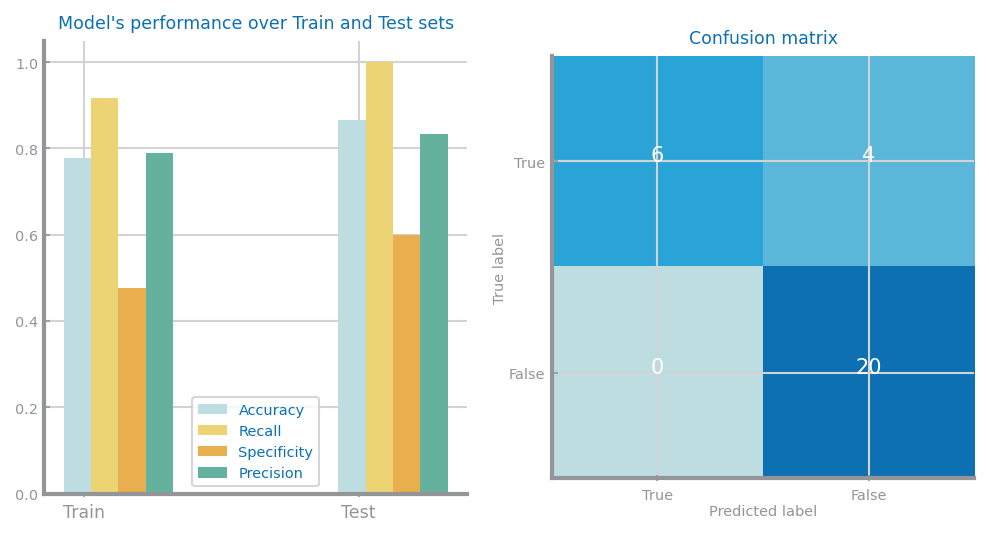

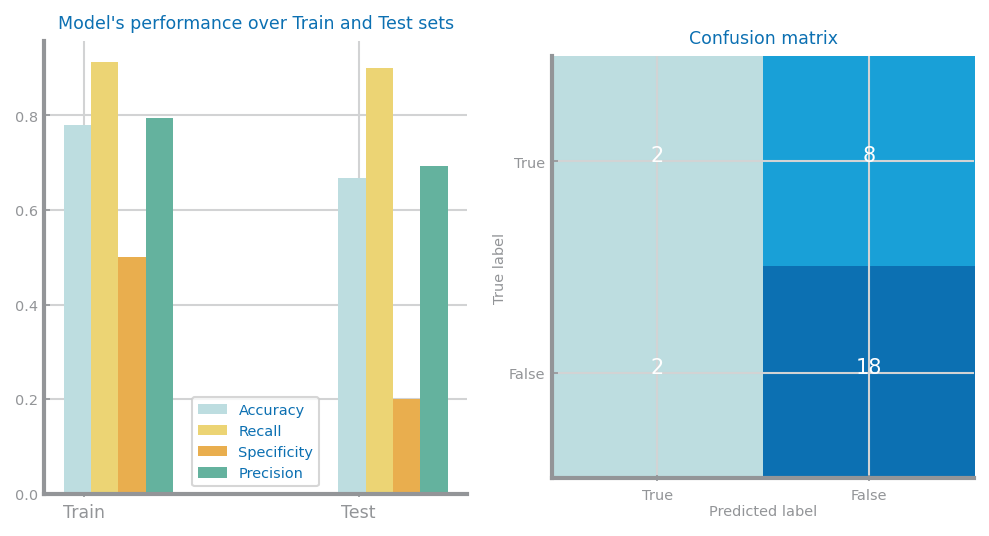

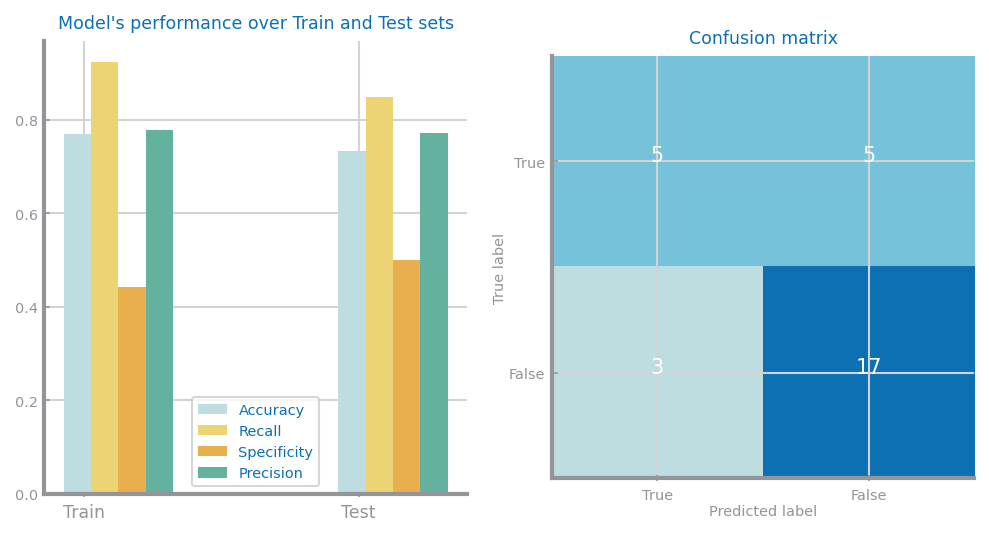

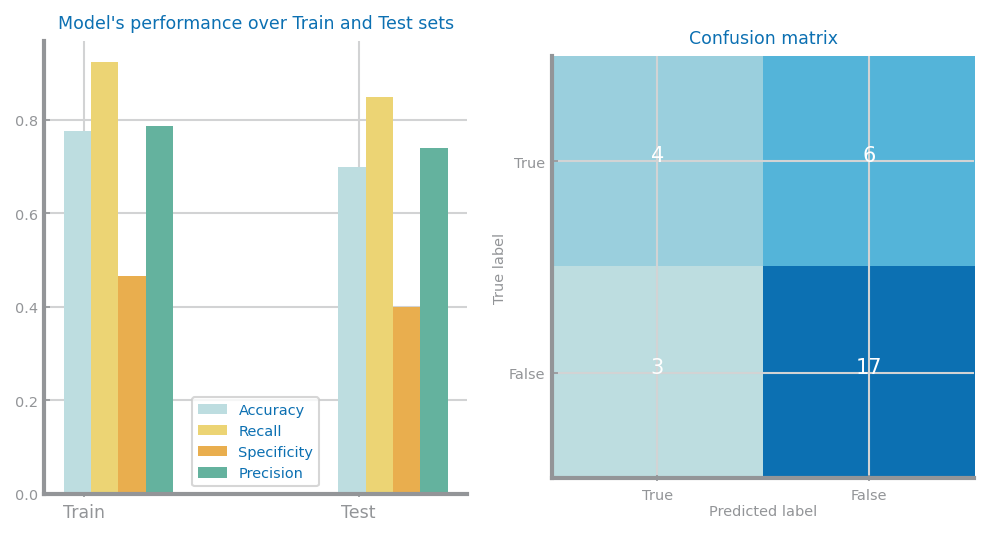

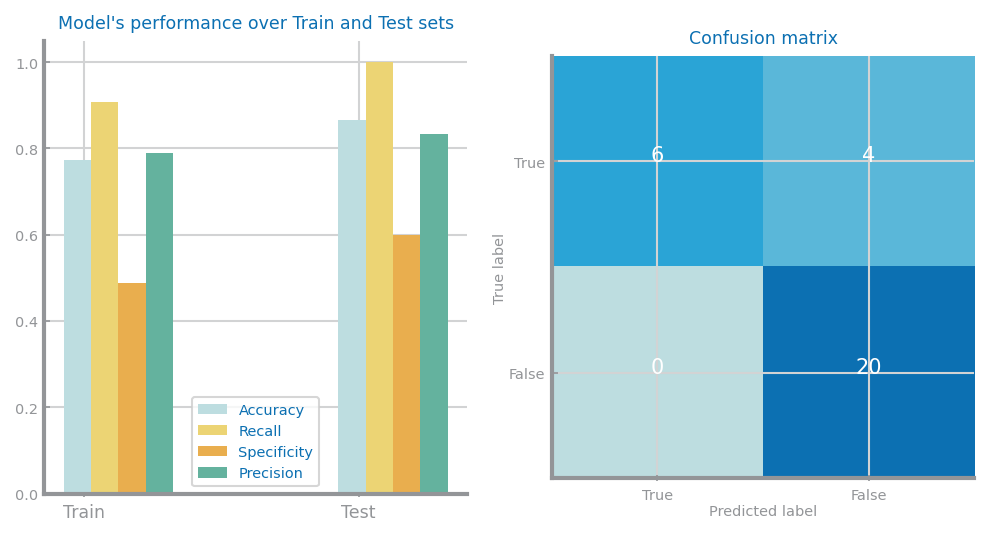

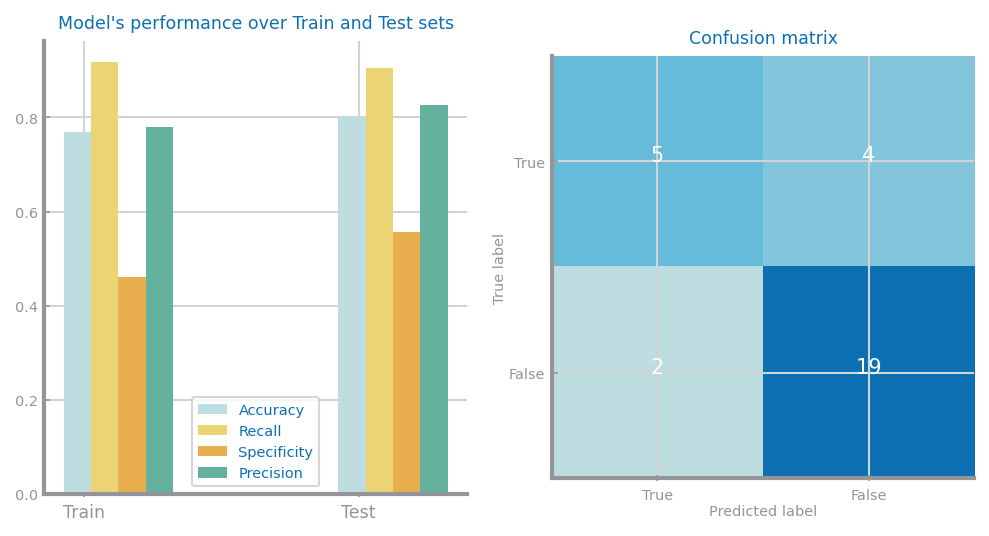

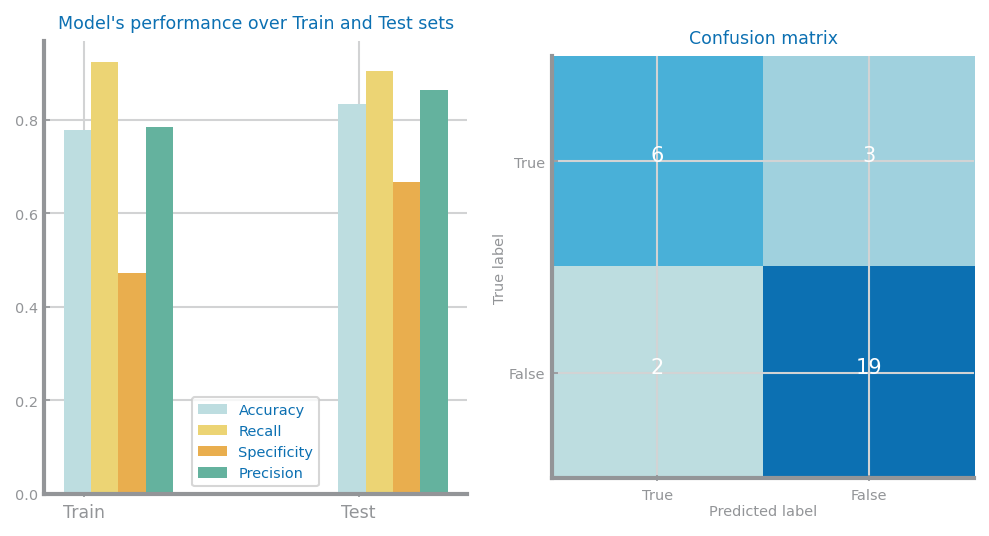

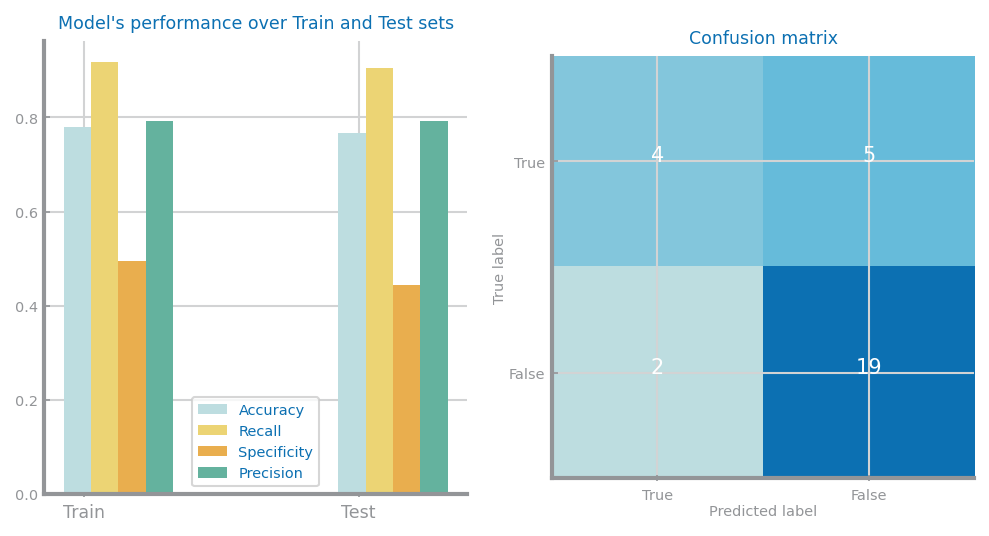

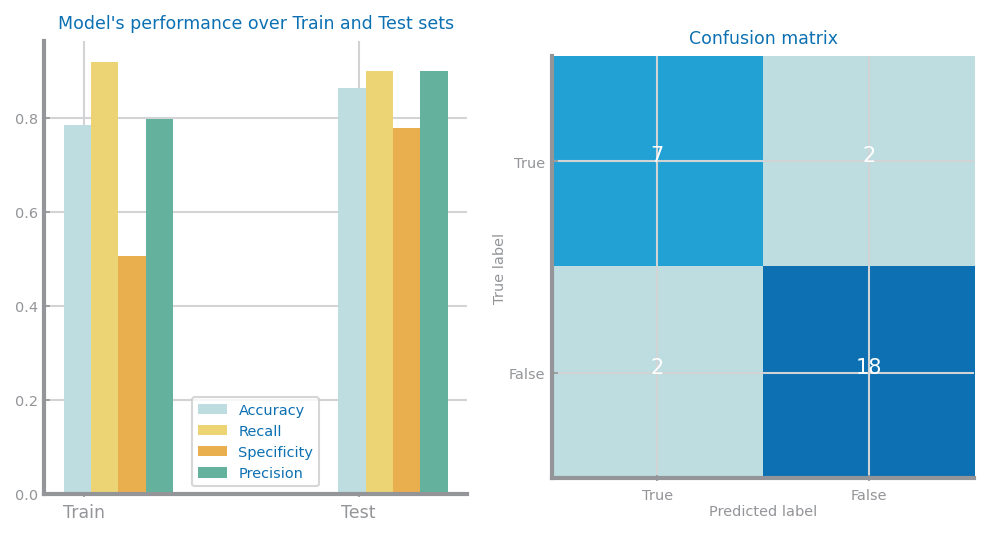

In [8]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    prd_trn = clf.predict(split['X_train'])
    prd_tst = split['prdY']
    ds.plot_evaluation_results(pd.unique(y), split['y_train'], prd_trn, split['y_test'], prd_tst, showXTickLabels=True)

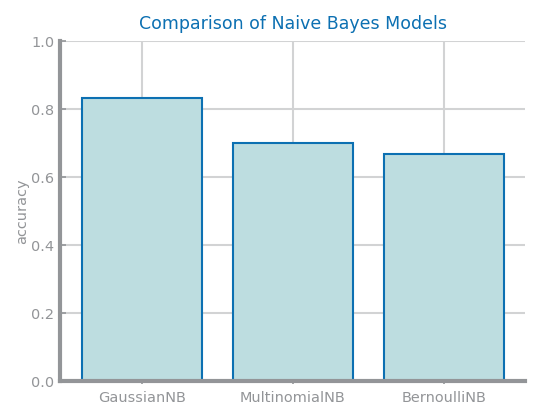

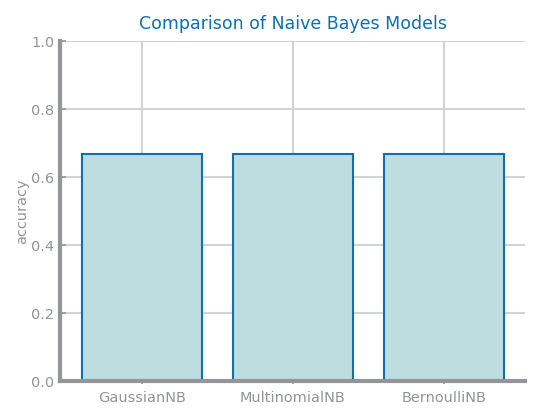

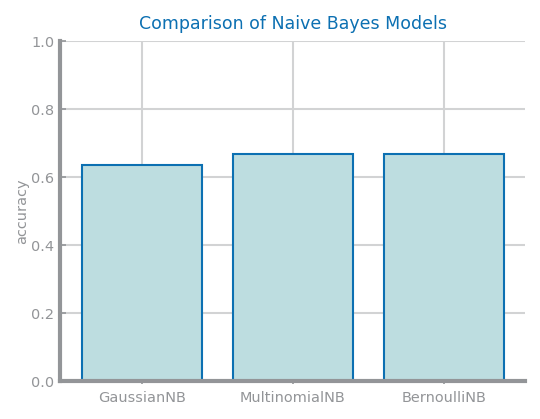

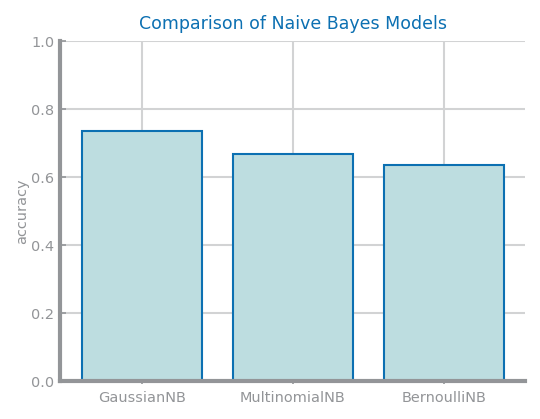

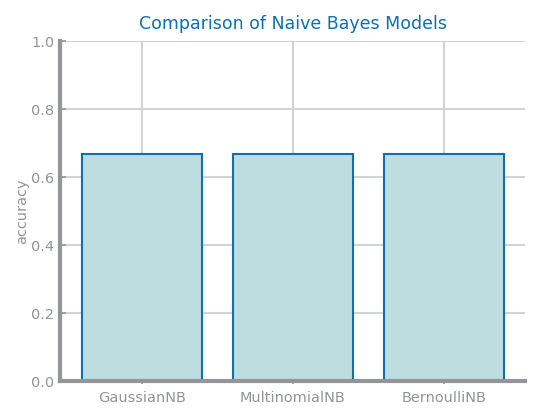

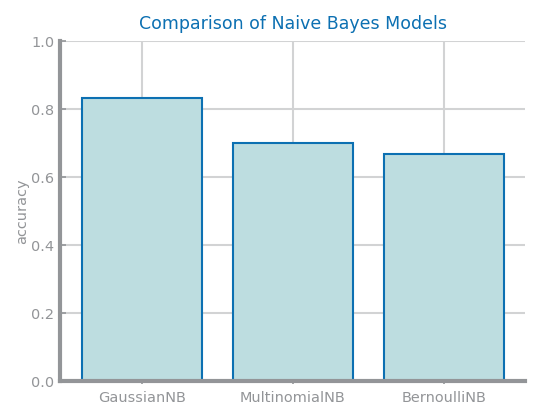

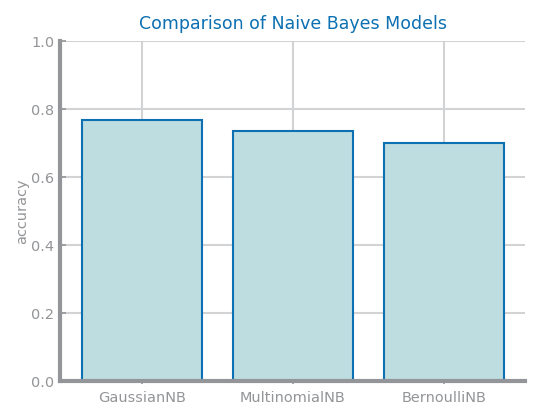

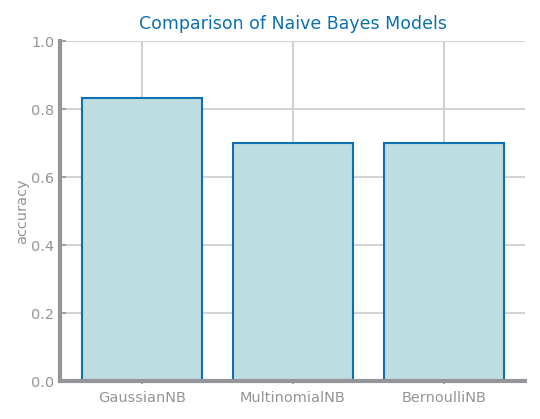

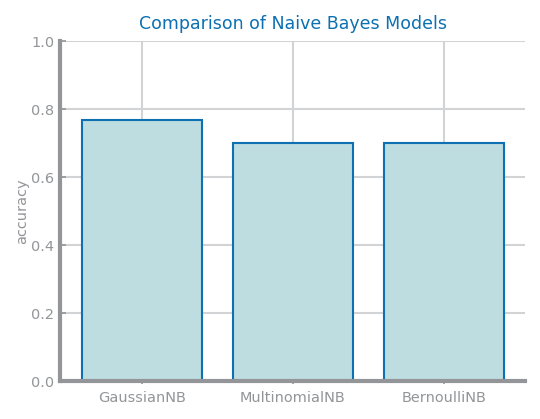

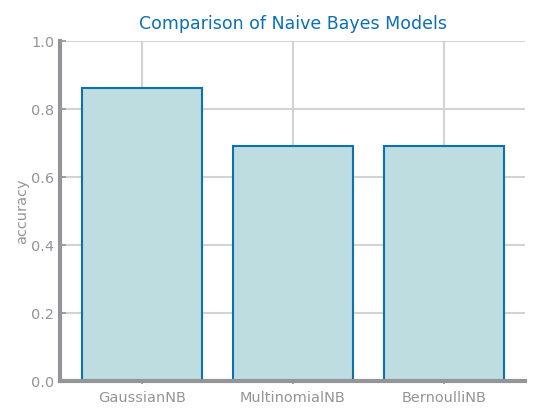

In [9]:
for split in splits:
    estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

    xvalues = []
    yvalues = []
    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(split['X_train'], split['y_train'])
        prdY = estimators[clf].predict(split['X_test'])
        yvalues.append(metrics.accuracy_score(split['y_test'], prdY))

    plt.figure()
    ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
    plt.show()

## 3.1. KNN

---

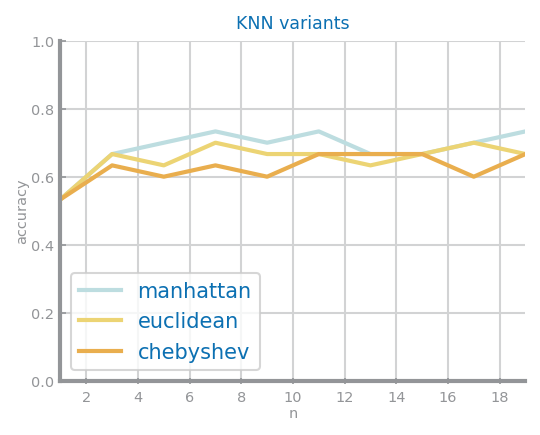

Best results with 7 neighbors and manhattan


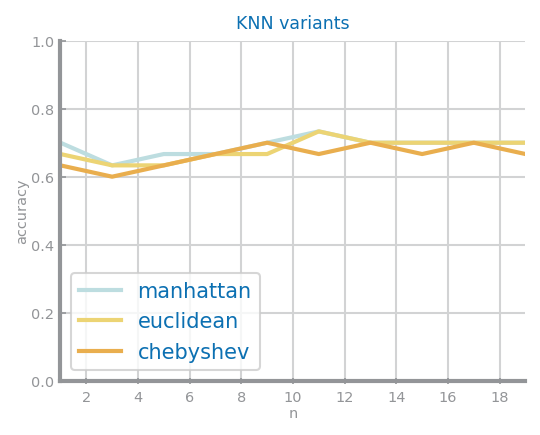

Best results with 11 neighbors and manhattan


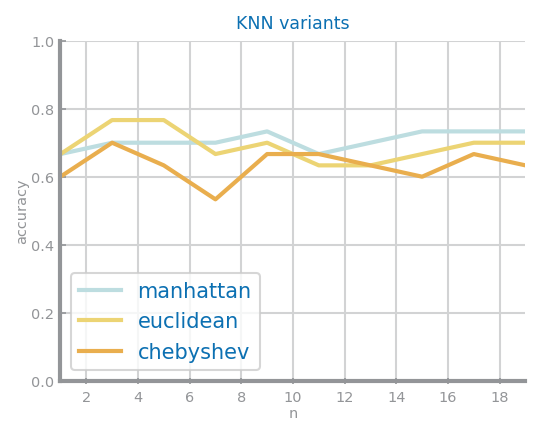

Best results with 3 neighbors and euclidean


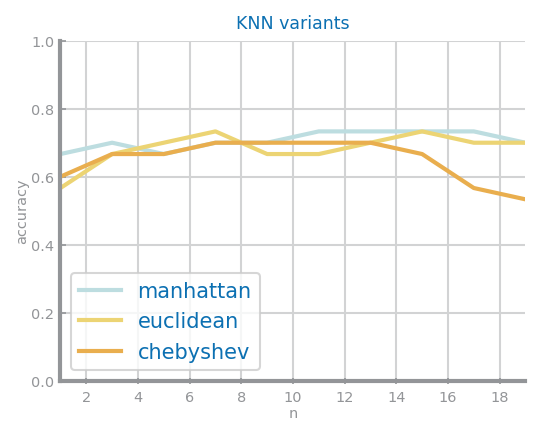

Best results with 11 neighbors and manhattan


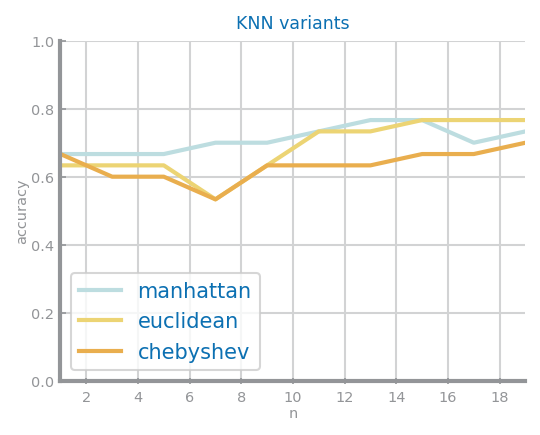

Best results with 13 neighbors and manhattan


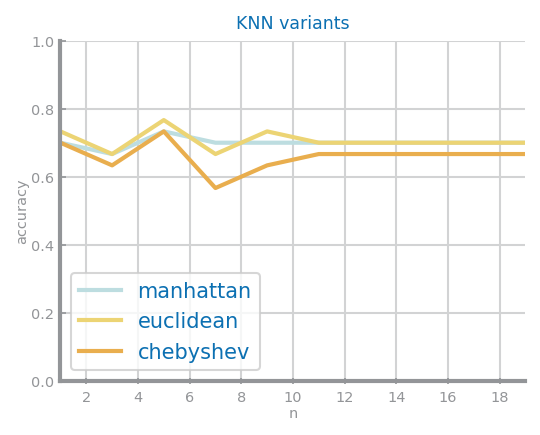

Best results with 5 neighbors and euclidean


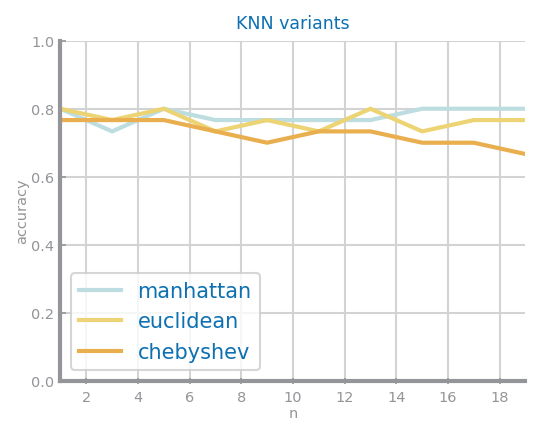

Best results with 1 neighbors and manhattan


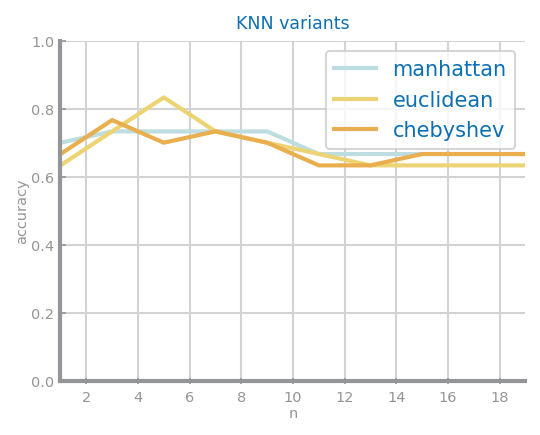

Best results with 5 neighbors and euclidean


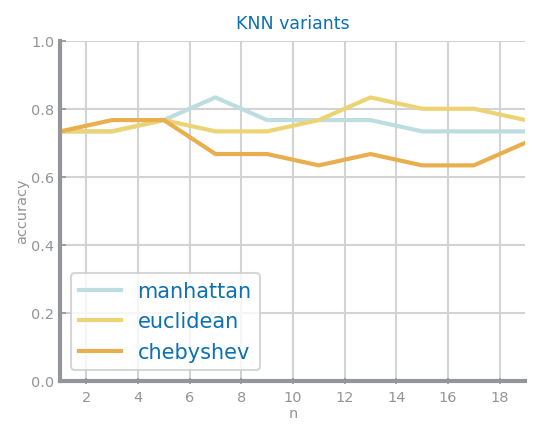

Best results with 7 neighbors and manhattan


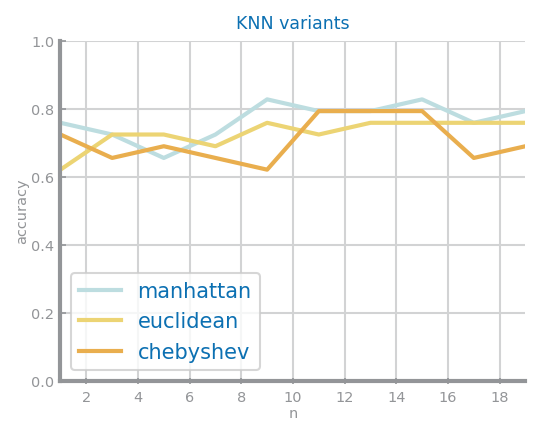

Best results with 9 neighbors and manhattan


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

for split in splits:
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(split['X_train'], split['y_train'])
            prdY = knn.predict(split['X_test'])
            yvalues.append(metrics.accuracy_score(split['y_test'], prdY))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues

    plt.figure()
    ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
    plt.show()
    print('Best results with %d neighbors and %s'%(best[0], best[1]))

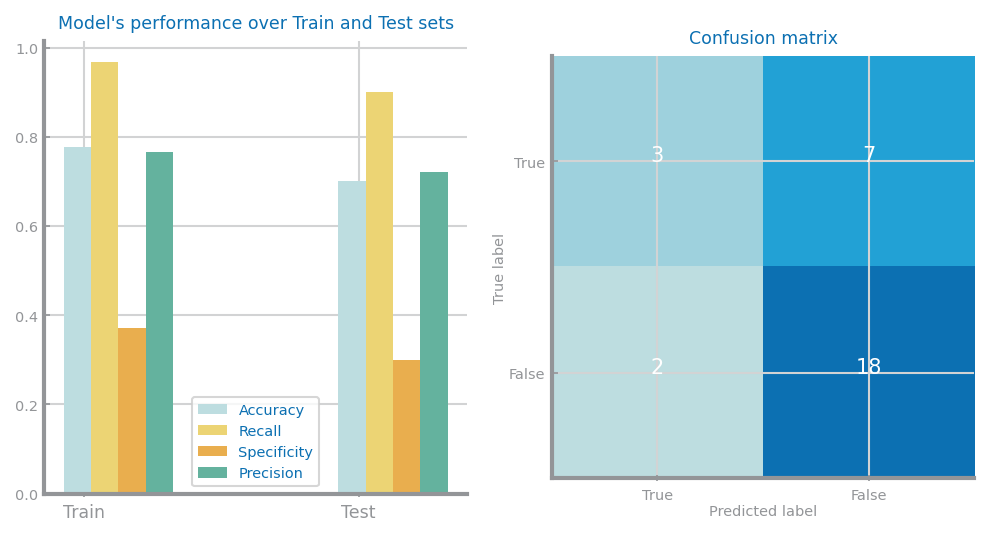

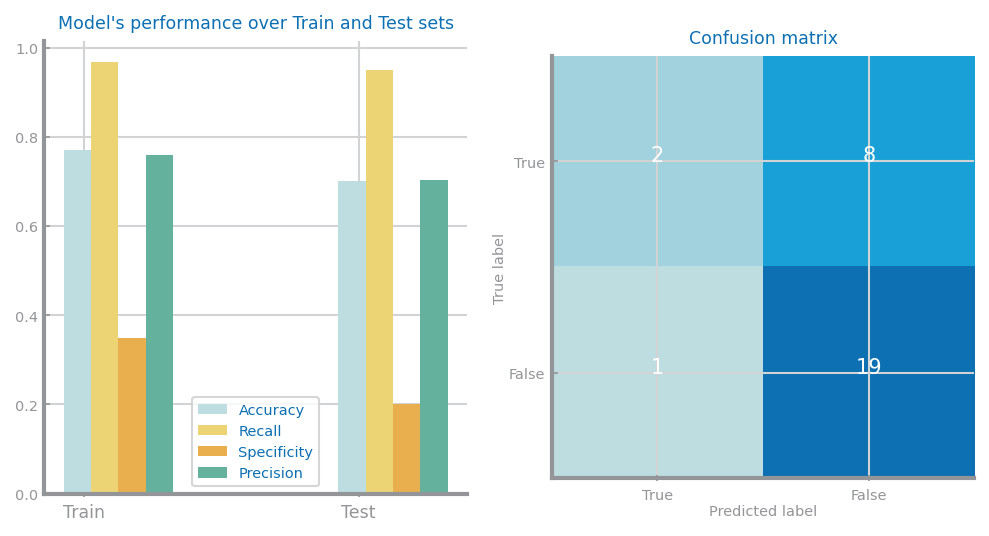

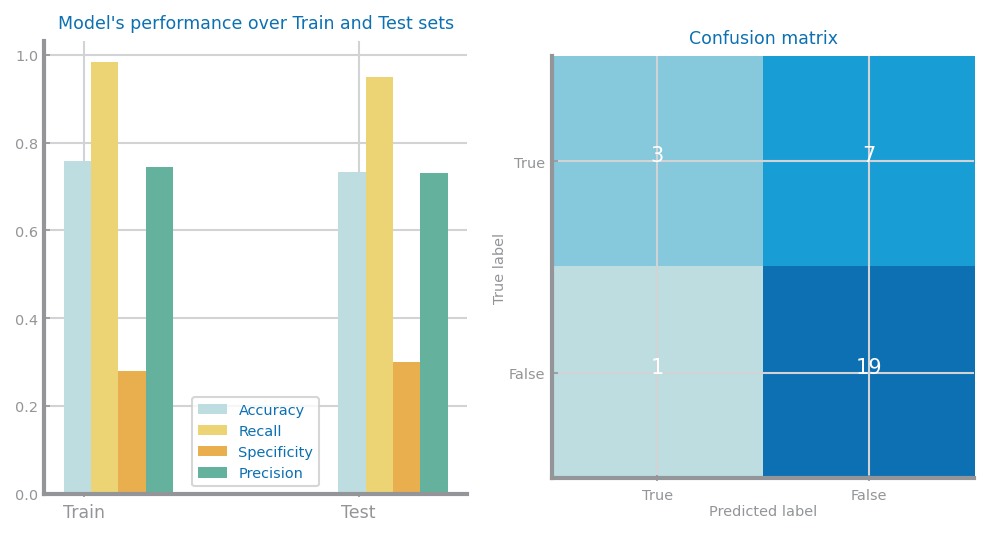

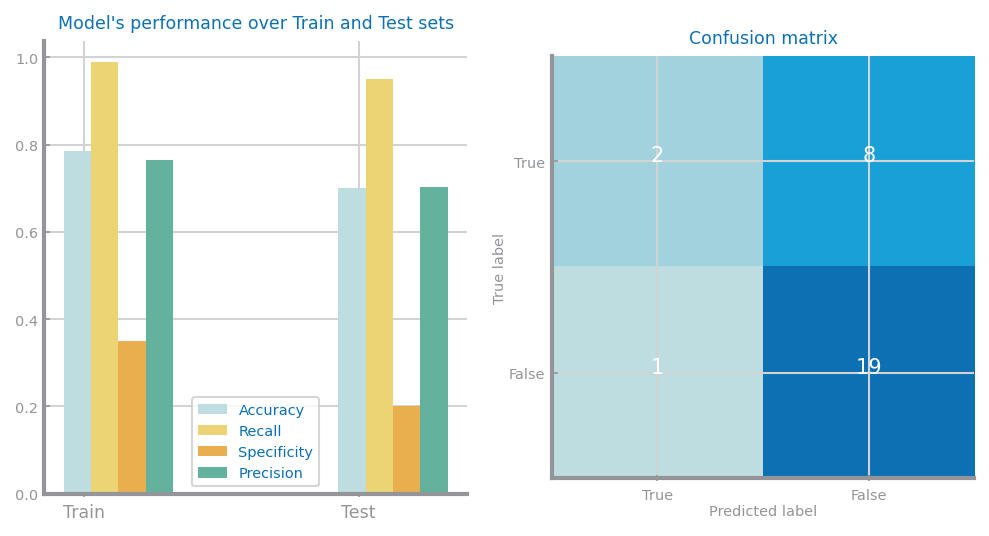

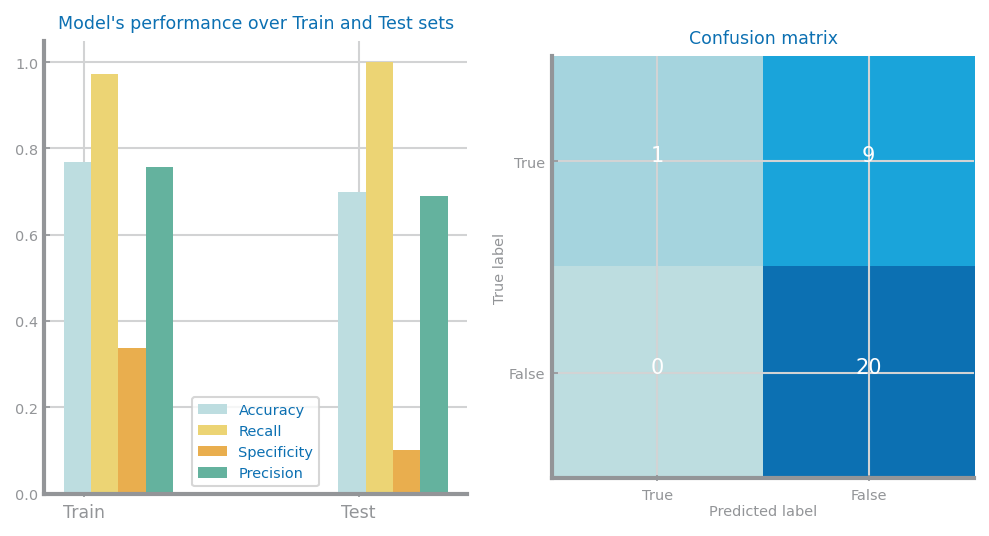

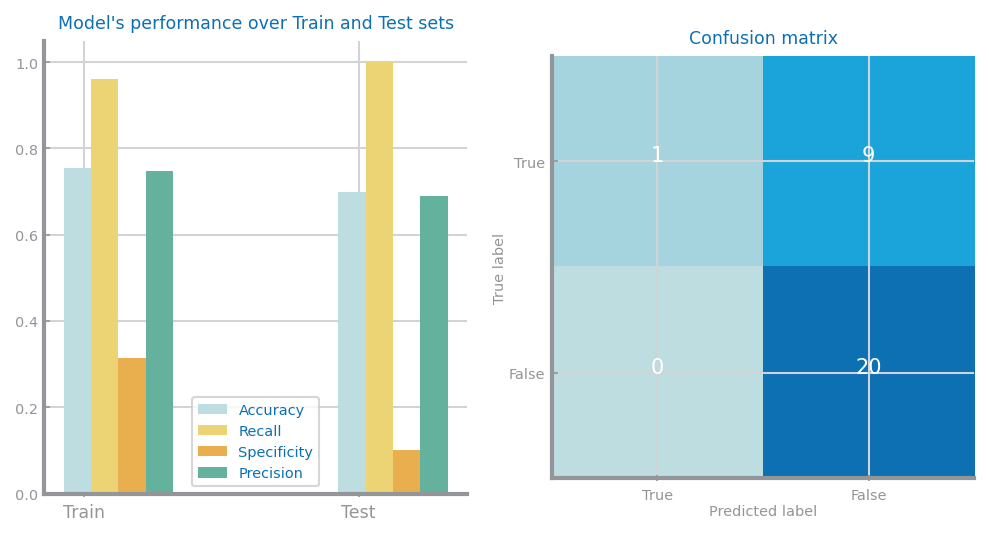

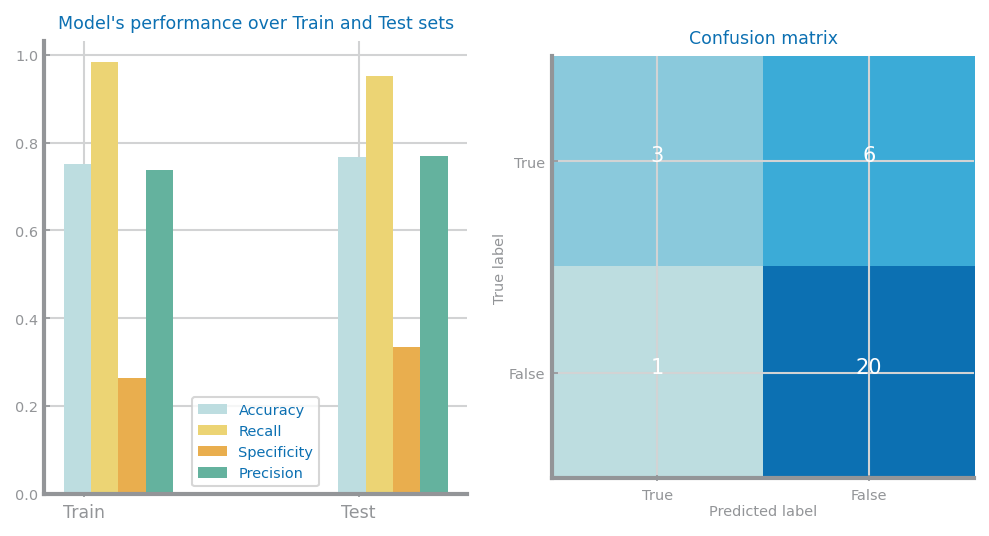

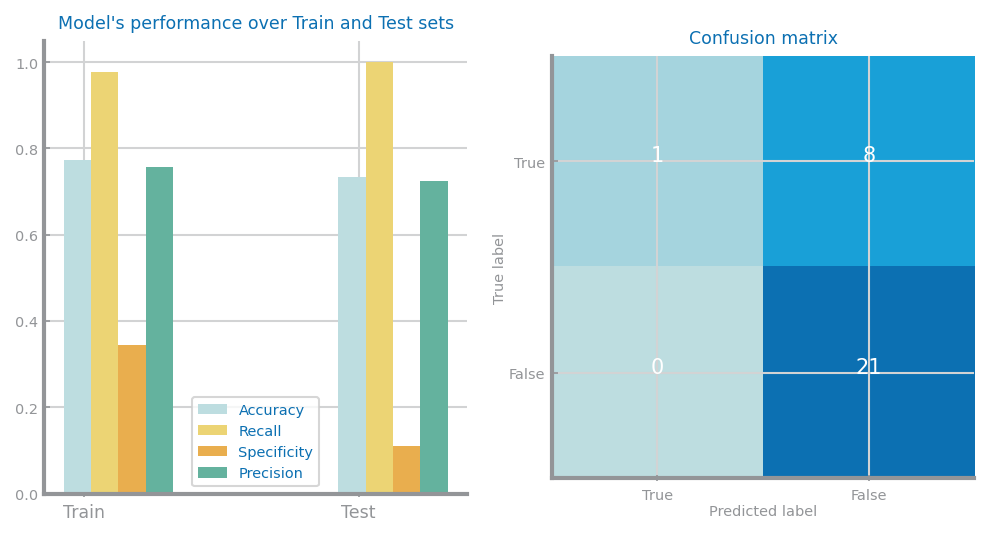

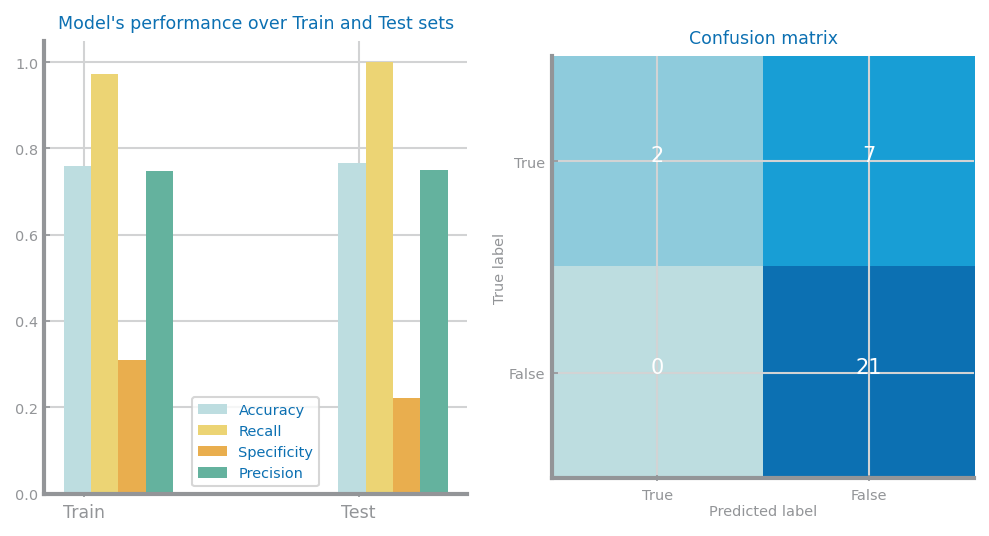

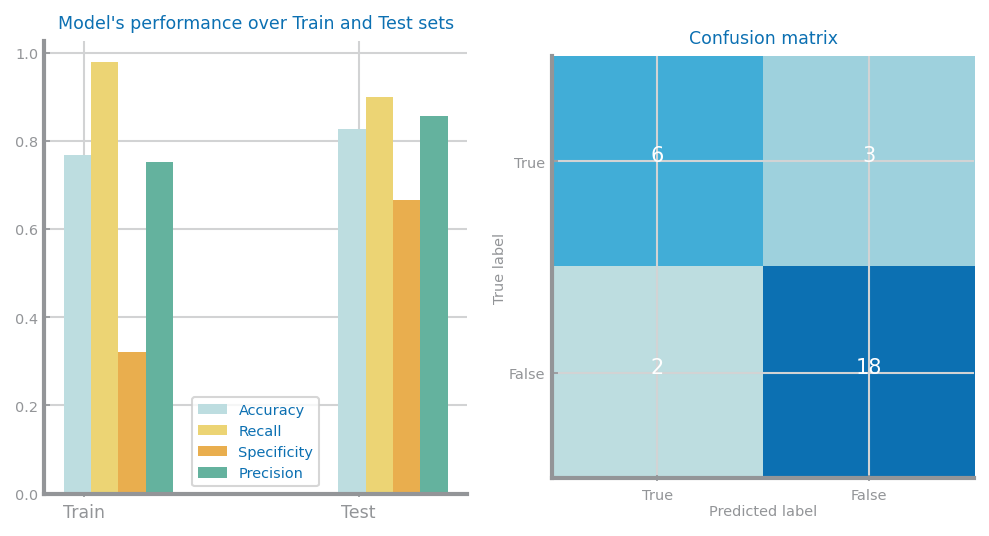

In [12]:
clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    prd_trn = clf.predict(split['X_train'])
    prd_tst = clf.predict(split['X_test'])
    ds.plot_evaluation_results(pd.unique(y), split['y_train'], prd_trn, split['y_test'], prd_tst, showXTickLabels=True)